### Contents

* [Reading dataset](#Reading-dataset)

    * [Sorting data by date_of_creation](#Sorting-data-by-date_of_creation)

* [Unique value stats for summarizing the data](#Unique-value-stats-for-summarizing-the-data)    
    * [Summarizing training dataset](#Summarizing-training-dataset:)

* [Data Preparation](#Data-Preparation)
    * [Fixing the ambiguous values in designation column](#Fixing-the-ambiguous-values-in-designation-column)
    * [Fixing the ambiguous values in resource column](#Fixing-the-ambiguous-values-in-resource-column)
    * [Fixing the ambiguous values in last_lead_update column](#Fixing-the-ambiguous-values-in-last_lead_update-column)

* [Missing value analysis](#Missing-value-analysis)
    * [Missing value stats by columns](#Missing-value-stats-by-columns)
    * [Filling missing values of geography column](#Filling-missing-values-of-geography-column)
    * [Filling missing values of weighted_amount column](#Filling-missing-values-of-weighted_amount-column)
    * [Filling missing values of deal_value column](#Filling-missing-values-of-deal_value-column)

In [1]:
from utils import *
from fill_missing import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import joblib

pd.set_option('display.max_columns', 50)

## Reading dataset

In [2]:
df_train = pd.read_csv('data/cleaned/train.csv', 
                       parse_dates=['date_of_creation'])

display(df_train.head())

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
0,Restaurants,320506.0,2067263.7,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,Construction Services,39488.0,240876.8,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,Hospitals/Clinics,359392.0,2407926.4,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,Real Estate,76774.0,468321.4,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Financial Services,483896.0,NaN,2019-05-22,Product_2,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


### Sorting data by `date_of_creation`

In [3]:
df_train = df_train.sort_values(by='date_of_creation')
df_train.reset_index(drop=True, inplace=True)

#### Inspecting head and tail of the sorted data

In [4]:
df_train.head()

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
0,Technology Consulting,326636.0,1959816.0,2019-01-01,Product_1,100 - 500 Million,Category 3,India,Brahmapur,gaytri bai,Chairman/Chief Innovation Officer,"Editor, commissioning",Others,Level 2,more than a month,"Dyson,William A",Deliverable,5,62.70
1,Other,64710.0,423850.5,2019-01-01,Product_1,50 - 100 Million,Category 4,India,Kavaratti,kamini,SVP/General Counsel,Community development worker,Marketing Event,Level 2,Pending,"Massiah,Gerard F",We have all the requirements,5,61.70
2,Hospitals/Clinics,170420.0,1073646.0,2019-01-01,Product_1,500 Million - 1 Billion,Category 1,India,Muzaffarpur,puja,Vice President / GM (04-present) : VP Sales an...,Hydrologist,Others,Level 2,Pending,"Sutton,Michelle R",No,3,107.34
3,Banks,480392.0,2906371.6,2019-01-01,Product_1,500 Million - 1 Billion,Category 3,India,Kavaratti,poonam,CEO/Co-Founder/Chairman,Office manager,Others,Level 3,More than a week back,"Van Arter,Derrick",No,1,61.50
4,Banks,261734.0,1583490.7,2019-01-01,Product_1,50 - 100 Million,Category 3,India,Mahabubnagar,alisha loomba,Chairman/Chief Innovation Officer,Manufacturing engineer,Marketing Event,Level 1,Did not hear back after Level 1,"Charles,Caleb",No,5,26.35


In [5]:
df_train.tail()

,industry,deal_value,weighted_amount,date_of_creation,pitch,lead_revenue,fund_category,geography,location,poc_name,designation,hiring_candidate_role,lead_source,level_of_meeting,last_lead_update,internal_poc,resource,internal_rating,success_probability
7002,Materials/Manufacturing,45251.0,257930.70,2021-02-15,Product_1,50 - 100 Million,Category 2,India,Cuttack,khushboo khan,CEO/Co-Founder/Chairman,Medical technical officer,Others,Level 3,Pending,"Gaskins Jr,Franklin D",Yes,4,61.3
7003,Financial Services,52662.0,284374.80,2021-02-15,Product_1,100 - 500 Million,Category 2,USA,"Greenville-Anderson-Mauldin, SC",Chad Brown,SVP/General Counsel,English as a second language teacher,Others,Level 1,Did not hear back after Level 1,"Green,Candy",Yes,1,62.2
7004,Restaurants,326727.0,2025707.40,2021-02-15,Product_2,50 - 100 Million,Category 3,India,Tezpur,ambika,CEO,"Radiographer, diagnostic",Contact Email,Level 3,More than a week back,"Heidelberg,Andre D",Deliverable,4,61.5
7005,Conglomerates,487253.0,3142781.85,2021-02-15,Product_1,500 Million - 1 Billion,Category 3,India,Vishakhapatnam,deeksha,Chairman/Chief Innovation Officer,Commercial/residential surveyor,Marketing Event,Level 3,More than a week back,"Ryker,David",Not enough,1,63.5
7006,Recreational Products,167888.0,990539.20,2021-02-15,Product_1,500 Million - 1 Billion,Category 3,NaN,Ajmer,rakhi soni,CEO,Bonds trader,Others,Level 2,More than 2 weeks,"Heidelberg,Andre D",Cannot deliver,4,62.0


## Unique value stats for summarizing the data

In [6]:
df_train_nunique = unique_value_stats(df_train)

display(df_train_nunique)

,column,unique_value_count
0,industry,171
1,deal_value,6907
2,weighted_amount,6480
3,date_of_creation,777
4,pitch,2
5,lead_revenue,3
6,fund_category,4
7,geography,2
8,location,597
9,poc_name,5261


### Summarizing training dataset:

* The data is collected from 01 Jan 2019 to 15 Feb 2021


* There are 171 industries in the data


* Lead was generated for two products i.e. `Product_1` and `Product_2`


* The revenue of the lead's organization can lie in the following range:

```python
['50 - 100 Million', '100 - 500 Million', '500 Million - 1 Billion']
```
    
* Funding category can be `['Category 1', 'Category 2', 'Category 3', 'Category 4']`


* Leads belong to two countries i.e. `USA` and `India`


* Designation has the following values:

```python
['Chairman/Chief Innovation Officer', 'SVP/General Counsel ',
 'Vice President / GM (04-present) : VP Sales and Marketing (01-04)',
 'CEO/Co-Founder/Chairman', 'CEO/Chairman/President',
 'Chairman/CEO/President', 'CEO', 'CEO/President',
 'Chief Executive Officer', 'Executive Vice President'
]
```

Looks like `designation` column has some ambiguities such as `CEO` or `Chief Executive Officer`


* The lead can come from the following sources:

```python
['Contact Email', 'Website', 'Marketing Event', 'Others']
```

* The level of meeting is defined [here](https://github.com/sank3t/Reduce-Marketing-Spend#call-level)


* The lead update has following values:

```python
['more than a month',
 'Pending',
 'More than a week back',
 'Did not hear back after Level 1',
 '?',
 'Up-to-date',
 '2 days back',
 '5 days back',
 'No track',
 'Following up but lead not responding',
 'More than 2 weeks'
 ]
 ```
 
 * The availability of resource can have following values:
 
```python
 ['Deliverable', 'We have all the requirements', 
  'No', 'Not enough',
  'Cannot deliver', 'Yes'
 ]
```

* The lead is rated on a scale of **1 to 5**

#### Interesting fact 🙂

The leads from India have their `poc_name` in lower case.

## Data Preparation

### Fixing the ambiguous values in `designation` column

In [7]:
designation_dict = {
    'Chairman/Chief Innovation Officer': 'CEO',
    'CEO/Co-Founder/Chairman': 'CEO',
    'CEO/Chairman/President': 'CEO',
    'Chairman/CEO/President': 'CEO',
    'CEO/President': 'CEO',
    'Chief Executive Officer': 'CEO',
    'Vice President / GM (04-present) : VP Sales and Marketing (01-04)': 'SVP/General Counsel',
    'Executive Vice President': 'SVP/General Counsel'
}

df_train = df_train.replace({'designation': designation_dict})
df_train['designation'] = df_train['designation'].str.strip()

In [8]:
df_train['designation'].unique()

array(['CEO', 'SVP/General Counsel'], dtype=object)

### Fixing the ambiguous values in `resource` column

In [9]:
resource_dict = {
    'Deliverable': 'Yes',
    'We have all the requirements': 'Yes',
    'Not enough': 'No',
    'Cannot deliver': 'No'
}

df_train = df_train.replace({'resource': resource_dict})
df_train['resource'] = df_train['resource'].str.strip()

### Fixing the ambiguous values in `last_lead_update` column

In [10]:
last_lead_update_dict = {
    'Following up but lead not responding' : 'No track',
    'More than a month': 'No track',
    'Did not hear back after Level 1': 'No track',
    'Pending': 'No track'
}

df_train = df_train.replace({'last_lead_update': last_lead_update_dict})
df_train['last_lead_update'] = df_train['last_lead_update'].str.strip()

## Missing value analysis

### Missing value stats by columns

In [11]:
df_train_missing = missing_value_stats(df_train)

display(df_train_missing)

,column,missing_values,missing_percentage
0,industry,1,0.01
1,deal_value,51,0.73
2,weighted_amount,525,7.49
3,geography,972,13.87
4,location,11,0.16
5,poc_name,8,0.11
6,last_lead_update,633,9.03
7,resource,149,2.13


### Filling missing values of `geography` column

In [12]:
# Getting non null values of poc_name
temp_poc = df_train.loc[~df_train['poc_name'].isna(), ['geography', 'poc_name']]

# Checking where poc_name are in lower cases
temp_poc['is_lower'] = temp_poc['poc_name'].str.islower()

#### Inspecting geographies by case of poc_name

In [13]:
# Geographies having poc_name in lower case
temp_poc[temp_poc['is_lower'] == True]['geography'].unique().tolist()

['India', nan]

In [14]:
# Geographies having poc_name in upper case
temp_poc[temp_poc['is_lower'] == False]['geography'].unique().tolist()

[nan, 'USA', 'India']

Wait a sec for a lead belongs to **India** the names are both in lower and upper case.

In [15]:
temp_poc[(temp_poc['is_lower'] == False) & (temp_poc['geography'] == 'India')]

,geography,poc_name,is_lower
603,India,कु0 भावना,False
931,India,जशोदा,False
2046,India,सानिया,False
2342,India,नसीम,False
4064,India,सलमा,False
4118,India,सोनिया,False
5287,India,लक्ष्‍मी,False
5702,India,नसीम,False
5876,India,शारदा बे,False
6058,India,यशोदा,False


As Hindi names can't be checked for lower case. This proves that leads from India has their `poc_name` in lower case.

In [16]:
df_train['geography'] = df_train['geography'].fillna(
    df_train['poc_name'].apply(lambda name: fill_geography(check_case(name)))
)

### Filling missing values of `weighted_amount` column

#### Checking correlation between features

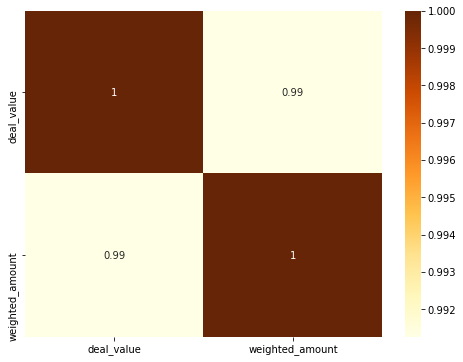

In [17]:
plt.figure(figsize=(8, 6))

sns.heatmap(df_train[['deal_value', 'weighted_amount']].corr(),
            annot=True, cmap='YlOrBr')
plt.show()

**Conclusion:**

* The `deal_value` and `weighted_amount` are highly positively correlated


* After observing the missing value stats [here](#Missing-value-stats-by-columns), the column `weighted_amount` has more missing values than `deal_value`.

    Since, these two columns are highly correlated, `deal_value` will first be used for imputing the missing `weighted_amount` using the _linear regression_ technique.
    
    
* Once the `weighted_amount` is imputed the missing `deal_value` will be imputed using the following equation:

    $probability =  \frac{weighted\_amount}{deal\_value}$
    
    Then calculating the median value of probability by grouping the industry and product pitched.

In [18]:
# Filtering the not null values for fitting the Linear Regression
filter1 = (~df_train['deal_value'].isna()) & (~df_train['weighted_amount'].isna())
deal_weighted_not_null_df = df_train.loc[filter1, ['deal_value', 'weighted_amount']]

deal_value_train = deal_weighted_not_null_df['deal_value'].values.reshape(-1, 1)
weighted_amount_train = deal_weighted_not_null_df['weighted_amount'].values.reshape(-1, 1)

# Filtering the not null deal_value and null weighted_amount for imputation
filter2 = (~df_train['deal_value'].isna()) & (df_train['weighted_amount'].isna())
weighted_null_df = df_train.loc[filter2, 'deal_value']
weighted_null_indices = weighted_null_df.index.tolist()

deal_value_test = weighted_null_df.values.reshape(-1, 1)

# Initializing and fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(deal_value_train, weighted_amount_train)

# Predicting null weighted amount
weighted_amount_pred = model.predict(deal_value_test).reshape(len(weighted_null_indices))

# Replacing null weighted amount
df_train.loc[weighted_null_indices, 'weighted_amount'] = weighted_amount_pred

#### Saving the model

In [19]:
joblib.dump(model, 'imputer/weighted_amount_imputer.pkl')

['imputer/weighted_amount_imputer.pkl']

### Filling missing values of `deal_value` column

In [20]:
df_train['probability'] = df_train['weighted_amount'] / df_train['deal_value']

industry_prob_by_product = df_train.groupby(['industry', 'pitch'])['probability'].agg({'median'}).reset_index()

industry_prob_by_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   industry  311 non-null    object 
 1   pitch     311 non-null    object 
 2   median    311 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.4+ KB


## Dumping transformed data

In [21]:
df_train.to_csv('data/transformed/train.csv', index=False)